# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


## Data Understanding and Exploration

In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reaing the dataset
df = pd.read_csv("file:///C:/Users/lenovo/Downloads/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the number of rows and columns in the dataset
df.shape

(730, 16)

In [4]:
# Checking the null values in the datset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Checking data types of the features
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Checking the columns present in the dataset 
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Getting statistical insights of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [8]:
# Divide the columns on the basic of the datatypes 

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()


In [9]:
print(non_numeric_columns)
print(numeric_columns)

['dteday']
['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


## Divide the data into categorical an continious variable


In [10]:
continious_columns = []
categorical_columns = []

for feature in numeric_columns:
    unique_values = df[feature].nunique()
    if unique_values<= 10:
        categorical_columns.append(feature)
    else:
        continious_columns.append(feature)
        
print(continious_columns)
print(categorical_columns)
    

['instant', 'mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']


## Checking For data imbalance 
- for checking the data imbalane in the dataset we need to check categorical columns
- we can took every categorical columns which we earlier divided into categorical and continious columns
- for checking imbalance we can use value counts method


In [11]:
for i in categorical_columns:
    print(f"Value counts for column: {i}")
    print(df[i].value_counts())
    print("=============================================")
    

Value counts for column: season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
Value counts for column: yr
0    365
1    365
Name: yr, dtype: int64
Value counts for column: holiday
0    709
1     21
Name: holiday, dtype: int64
Value counts for column: weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
Value counts for column: workingday
1    504
0    226
Name: workingday, dtype: int64
Value counts for column: weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64


- as we can see there is some instances of the data imbalance in the dataset.
    - holiday variable 
    - weathersit variable

# Dropping Columns
- Dropping the casual and registered columns from dataset because <b>cnt</b> columns contain count of total rental bikes including both casual and registered.
- Dropping the instant column because it contain record of index.
- Dropping the dteday column because it is redundant we already have year month weekday in the dataset so we don't need this column although we can extract day from this column because day is not given in the dataset
 


In [12]:
df.drop(["casual","registered"], inplace = True, axis = 1)
df.drop(["instant"], inplace = True, axis = 1)
df.drop(["dteday"], inplace = True, axis = 1)

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Performimng EDA



#### Data Information

- instant: record index
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- cnt: count of total rental bikes including both casual and registered

### Univariate Analysis

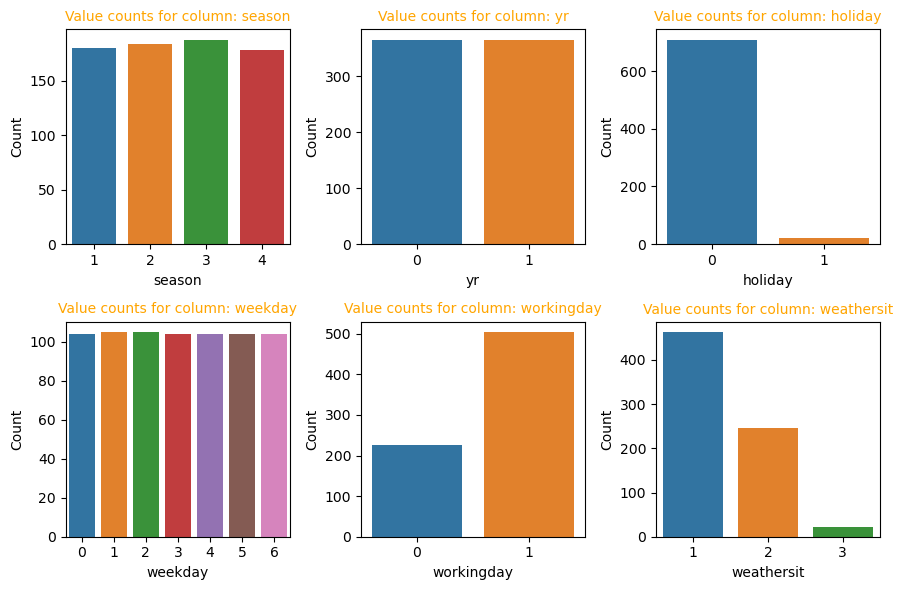

In [14]:
# Number of columns and rows for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plotting
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Value counts for column: {col}', fontsize = 10, color = "orange")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
df_col = df.columns

In [16]:
#Finding continious numerical column
numerical_cloumns= []
for i in df_col:
    if len(df[i].value_counts()) > 25:
        numerical_cloumns.append(i)        

In [17]:
numerical_cloumns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

### Outlier Analysis

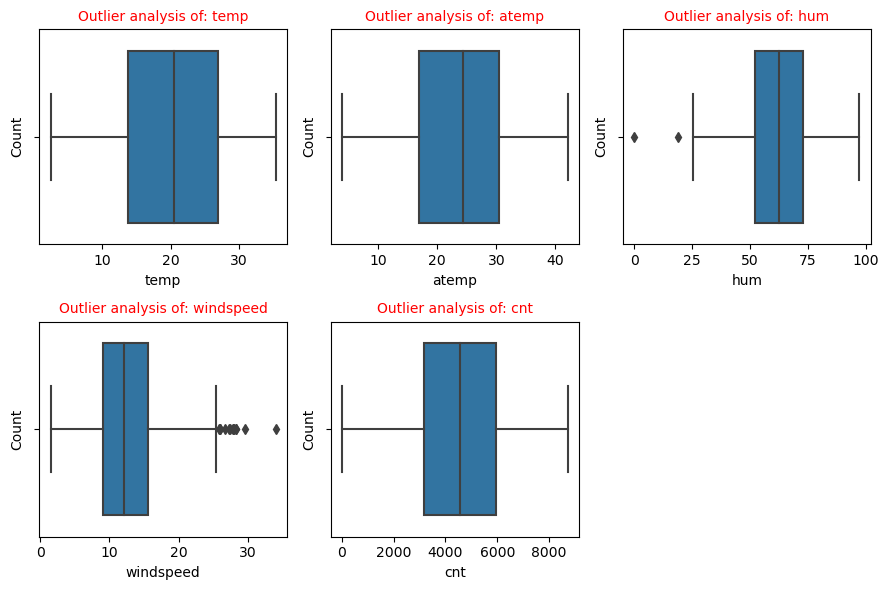

In [18]:
# Number of columns and rows for subplots
n_cols = 3
n_rows = (len(numerical_cloumns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plotting
for i, col in enumerate(numerical_cloumns):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Outlier analysis of: {col}', fontsize = 10, color = "red")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
    

- from above analysis we find the conclusion is that there is not many outlier, in humidity and windspeed variable there is outlier but very less. 

#### For doing further Eda we need to tranform features, Getting more insights

In [19]:
# Mapping Dictionary
mapping = {0: 2018, 1: 2019}
# Replacing Values
df['yr'].replace(mapping,inplace = True)

# Mapping Dictionary
mapping1 = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
# Replacing Values
df['season'].replace(mapping1,inplace = True)

# Mapping Dictionary
mapping2 = {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
# Replacing Values
df['mnth'].replace(mapping2,inplace = True)

# Mapping Dictionary
mapping3 = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}
# Replacing Values
df['weekday'].replace(mapping3,inplace = True)

# Mapping Dictionary
mapping4 = {1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"}
# Replacing Values
df['weathersit'].replace(mapping4,inplace = True)

mapping5 = {0:"Holiday", 1:"Not Holiday" }
# Replacing Values
df['workingday'].replace(mapping5,inplace = True)


In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,Not Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,Not Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,Not Holiday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,Not Holiday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,Not Holiday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df.workingday.value_counts()

Not Holiday    504
Holiday        226
Name: workingday, dtype: int64

In [22]:
categorical_columns = []
for i in df.columns:
    if len(df[i].value_counts())<=12:
        categorical_columns.append(i)
categorical_columns

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,Not Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,Not Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,Not Holiday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,Not Holiday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,Not Holiday,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualization

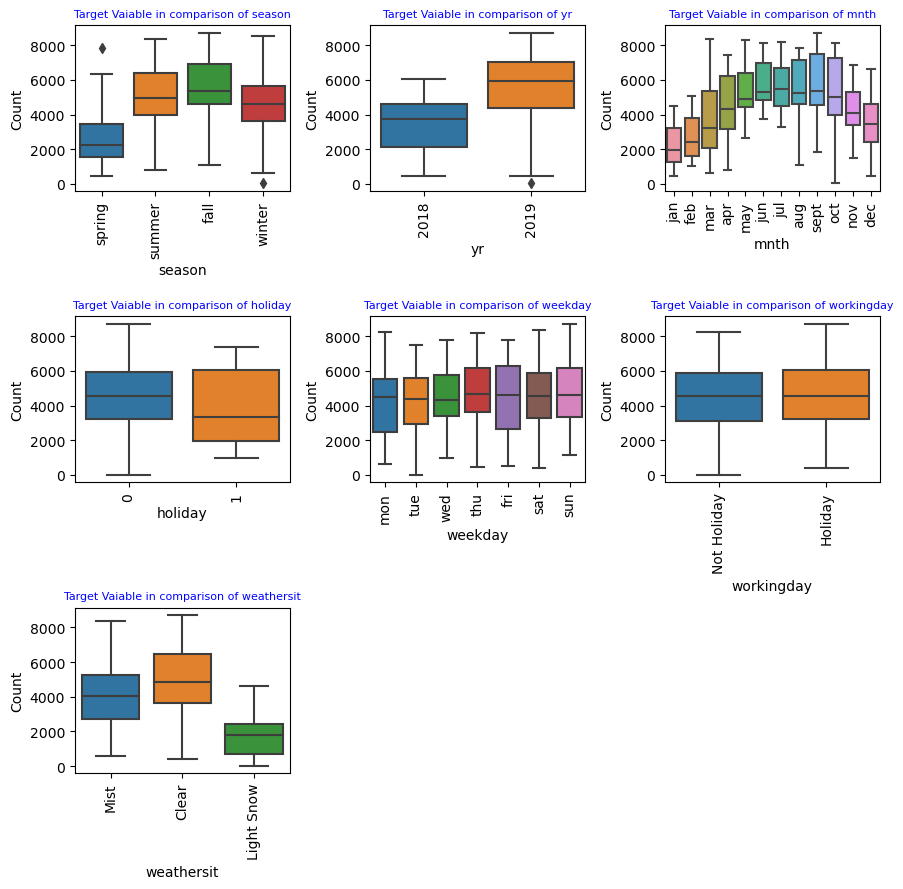

In [24]:
# As we know our target variable is cnt

# Number of columns and rows for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plotting
for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col,y = "cnt", data=df, ax=axes[i])
    axes[i].set_title(f'Target Vaiable in comparison of {col}', fontsize = 8, color = "blue")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='x')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-ticks



# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
    

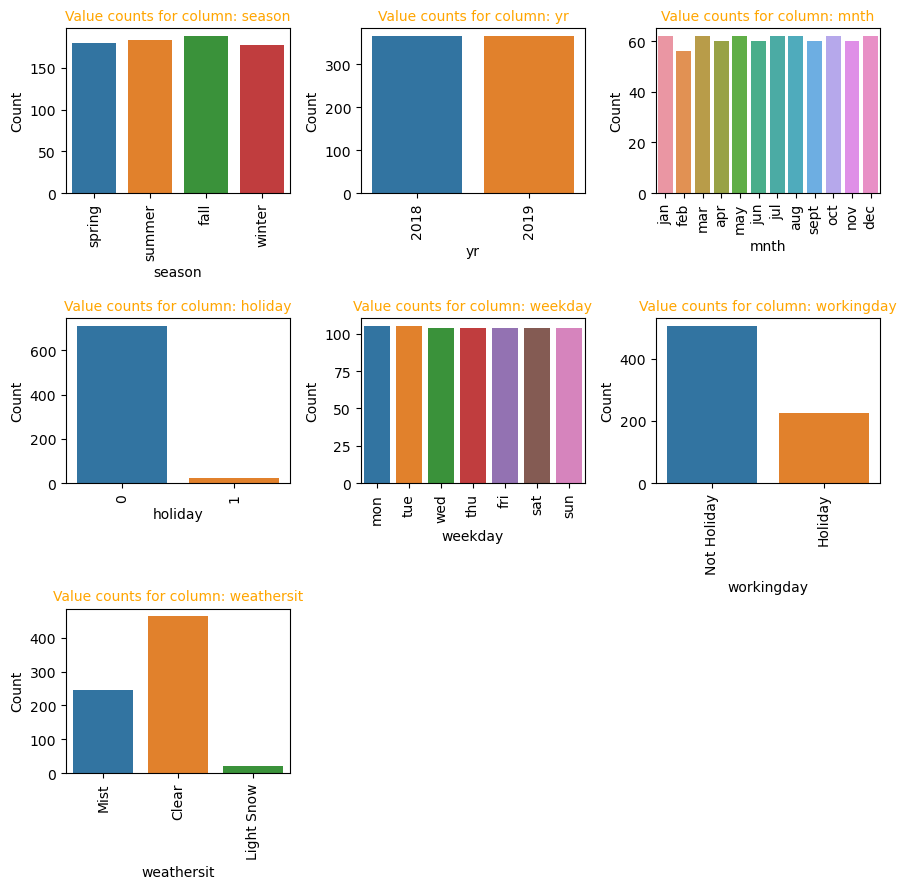

In [25]:
# Number of columns and rows for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plotting
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Value counts for column: {col}', fontsize = 10, color = "orange")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### Multivariate Analysis
- As we know our target variable is <b>cnt</b> 
- So we can see the co relation of numerical variable with target variable

In [26]:
numerical_cloumns = ["temp","atemp","hum","windspeed","cnt"]

<Figure size 1200x500 with 0 Axes>

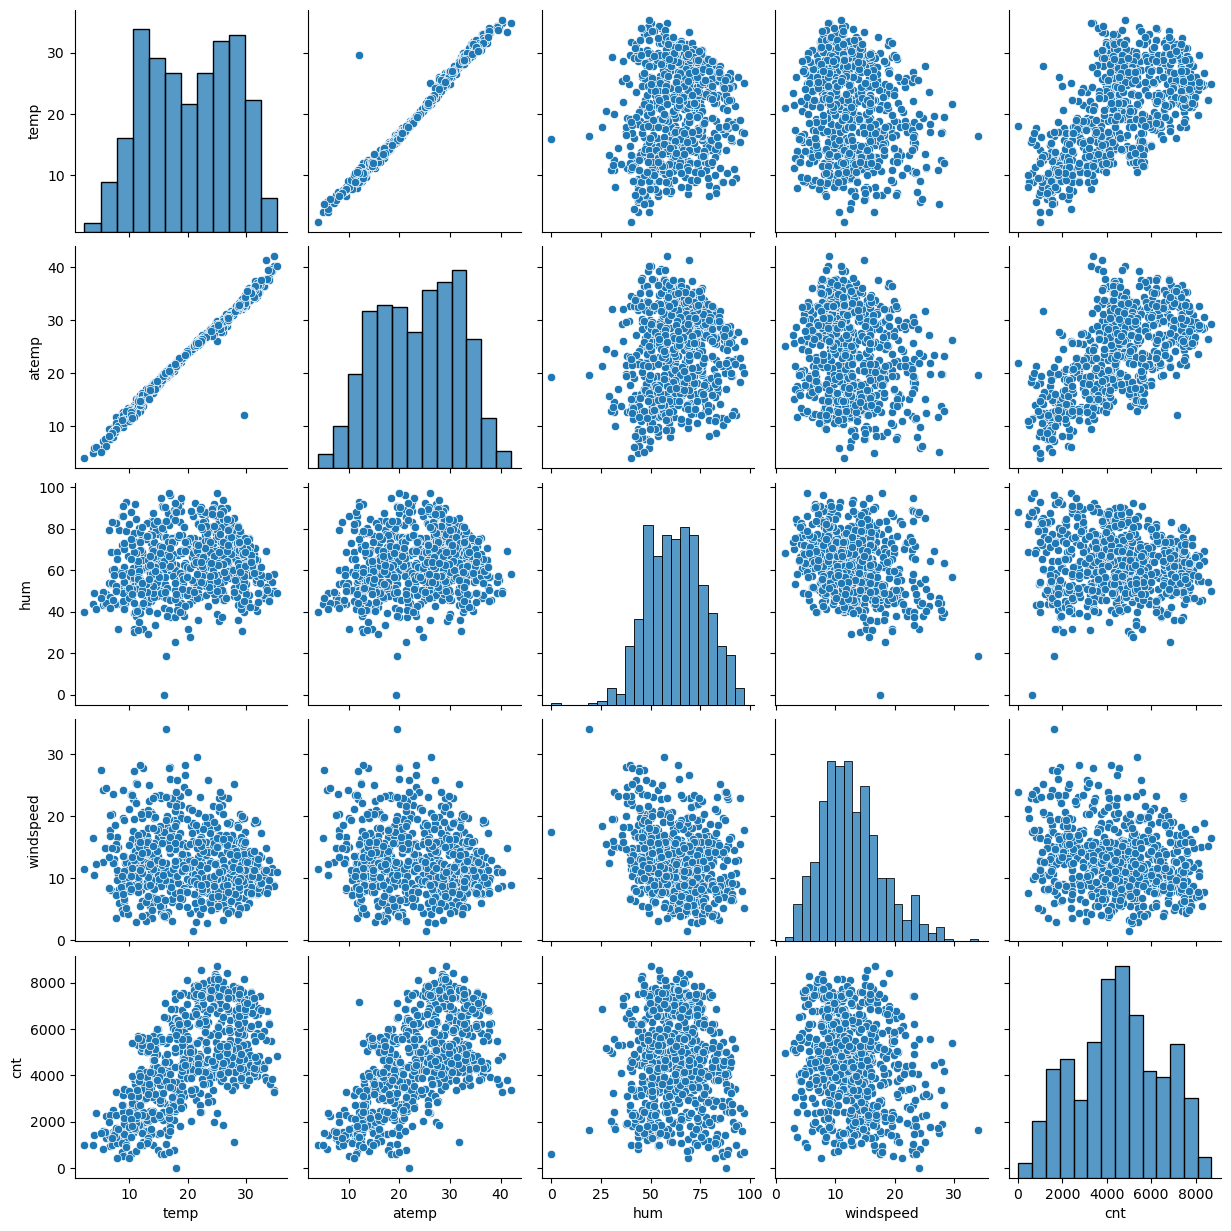

In [27]:
plt.figure(figsize = (12,5))
sns.pairplot(data = df, vars = numerical_cloumns)
plt.show()

In [28]:
cor = df.corr()
cor

,yr,holiday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
temp,0.048789,-0.028764,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.627044,0.630685,-0.098543,-0.235132,1.000000


## Checking for correlation

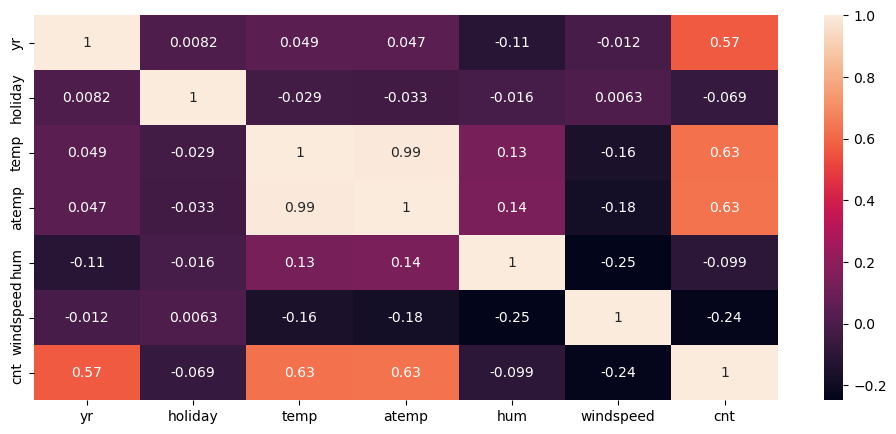

In [29]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

- We are getting lots of insights from above heatmap

  Correlation of output variable("cnt") with dependent variables.
  - count(cnt) is negatively correlated with windspeed(-0.24 approx), it means the demand of shared bike is less in windy days.
  - count(cnt) is positively correlated with year, it give us impression that demand of the shared bike is increasing year over     year.
  Correlation among independent variables.
  - Some of the independent variables are highly correlated : atemp and temp are highly positively correlated.The coorelation between them is 0.99 almost equal to 1 
   
  

In [30]:
#removing atemp as it is highly correlated with temp
df.drop("atemp", axis = 1, inplace = True)

## Finding the trends 

- Let see the growth in demand of bike over a period of time 
- we can see weekly basis(week on week)
- we can see monthly basis(month on month)
- we can see year on year
- we can where there is more demand on holidays or workingday

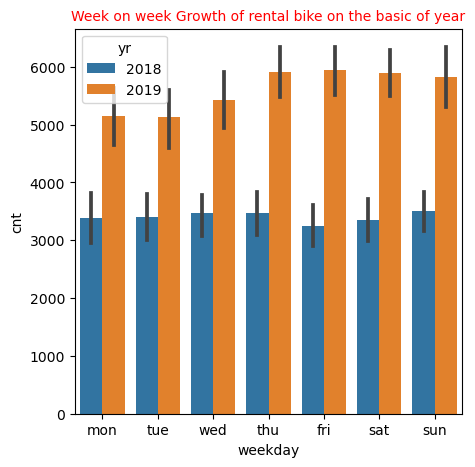

In [31]:
plt.figure(figsize = (5,5))
sns.barplot(x = "weekday", y = "cnt", hue = "yr", data = df)
plt.title("Week on week Growth of rental bike on the basic of year", fontsize = 10, color = "red")
plt.show()

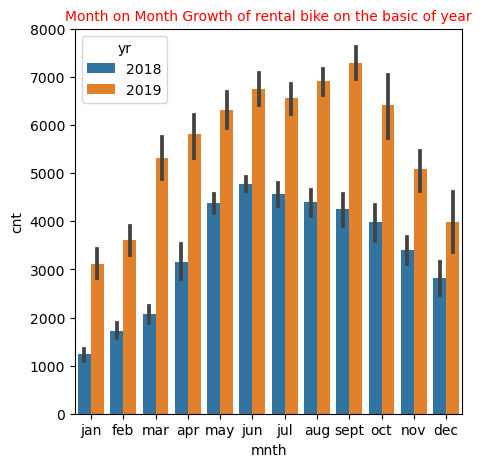

In [32]:
plt.figure(figsize = (5,5))
sns.barplot(x = "mnth", y = "cnt", hue = "yr", data = df)
plt.title("Month on Month Growth of rental bike on the basic of year", fontsize = 10, color = "red")
plt.show()

In [33]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,Not Holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,tue,Not Holiday,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,wed,Not Holiday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,Not Holiday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,Not Holiday,Clear,9.305237,43.6957,12.522300,1600


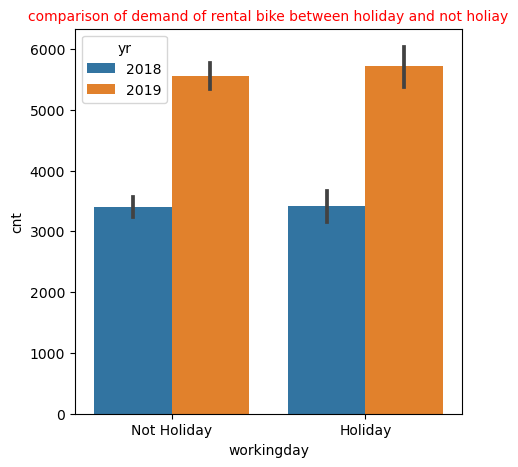

In [34]:
plt.figure(figsize = (5,5))
sns.barplot(x = "workingday", y = "cnt", hue = "yr", data = df)
plt.title("comparison of demand of rental bike between holiday and not holiay", fontsize = 10, color = "red")
plt.show()

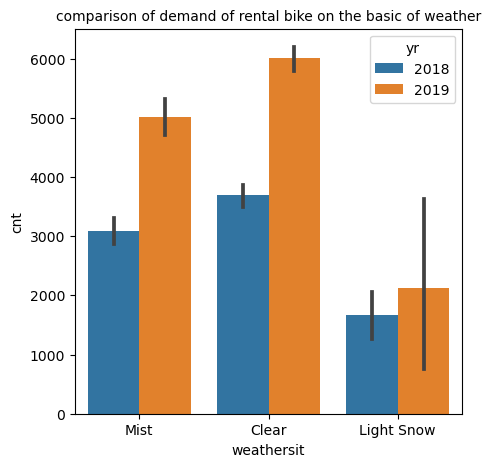

In [35]:
plt.figure(figsize = (5,5))
sns.barplot(x = "weathersit", y = "cnt", hue = "yr", data = df)
plt.title("comparison of demand of rental bike on the basic of weather", fontsize = 10)
plt.show()

#### Infrences from eda

- The demand for rental bikes increased significantly in 2019 compared to 2018.
- It is very evident from above visulation that the demand of rental bike is increasing over month by month and week by week.
- There is no clear evidence that demand for rental bike is more on working days and less for holiday more and less both wekend and working day have same demand for rental bike.
- It is very clear that the demand of rental bike is more when the weather is clear.


# Linear Regression

### Prepare the data for training

In [36]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,Not Holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,tue,Not Holiday,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,wed,Not Holiday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,Not Holiday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,Not Holiday,Clear,9.305237,43.6957,12.522300,1600


In [37]:
df = pd.get_dummies(df, columns=['weekday','mnth',"season",'yr','weathersit',"workingday"], drop_first = True, dtype="int")


In [38]:
df.head()

,holiday,temp,hum,windspeed,cnt,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,...,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,yr_2019,weathersit_Light Snow,weathersit_Mist,workingday_Not Holiday
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,0,8.050924,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,8.200000,59.0435,10.739832,1562,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,9.305237,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
df.dtypes

holiday                     int64
temp                      float64
hum                       float64
windspeed                 float64
cnt                         int64
weekday_mon                 int32
weekday_sat                 int32
weekday_sun                 int32
weekday_thu                 int32
weekday_tue                 int32
weekday_wed                 int32
mnth_aug                    int32
mnth_dec                    int32
mnth_feb                    int32
mnth_jan                    int32
mnth_jul                    int32
mnth_jun                    int32
mnth_mar                    int32
mnth_may                    int32
mnth_nov                    int32
mnth_oct                    int32
mnth_sept                   int32
season_spring               int32
season_summer               int32
season_winter               int32
yr_2019                     int32
weathersit_Light Snow       int32
weathersit_Mist             int32
workingday_Not Holiday      int32
dtype: object

## See the distribution of data using histogram

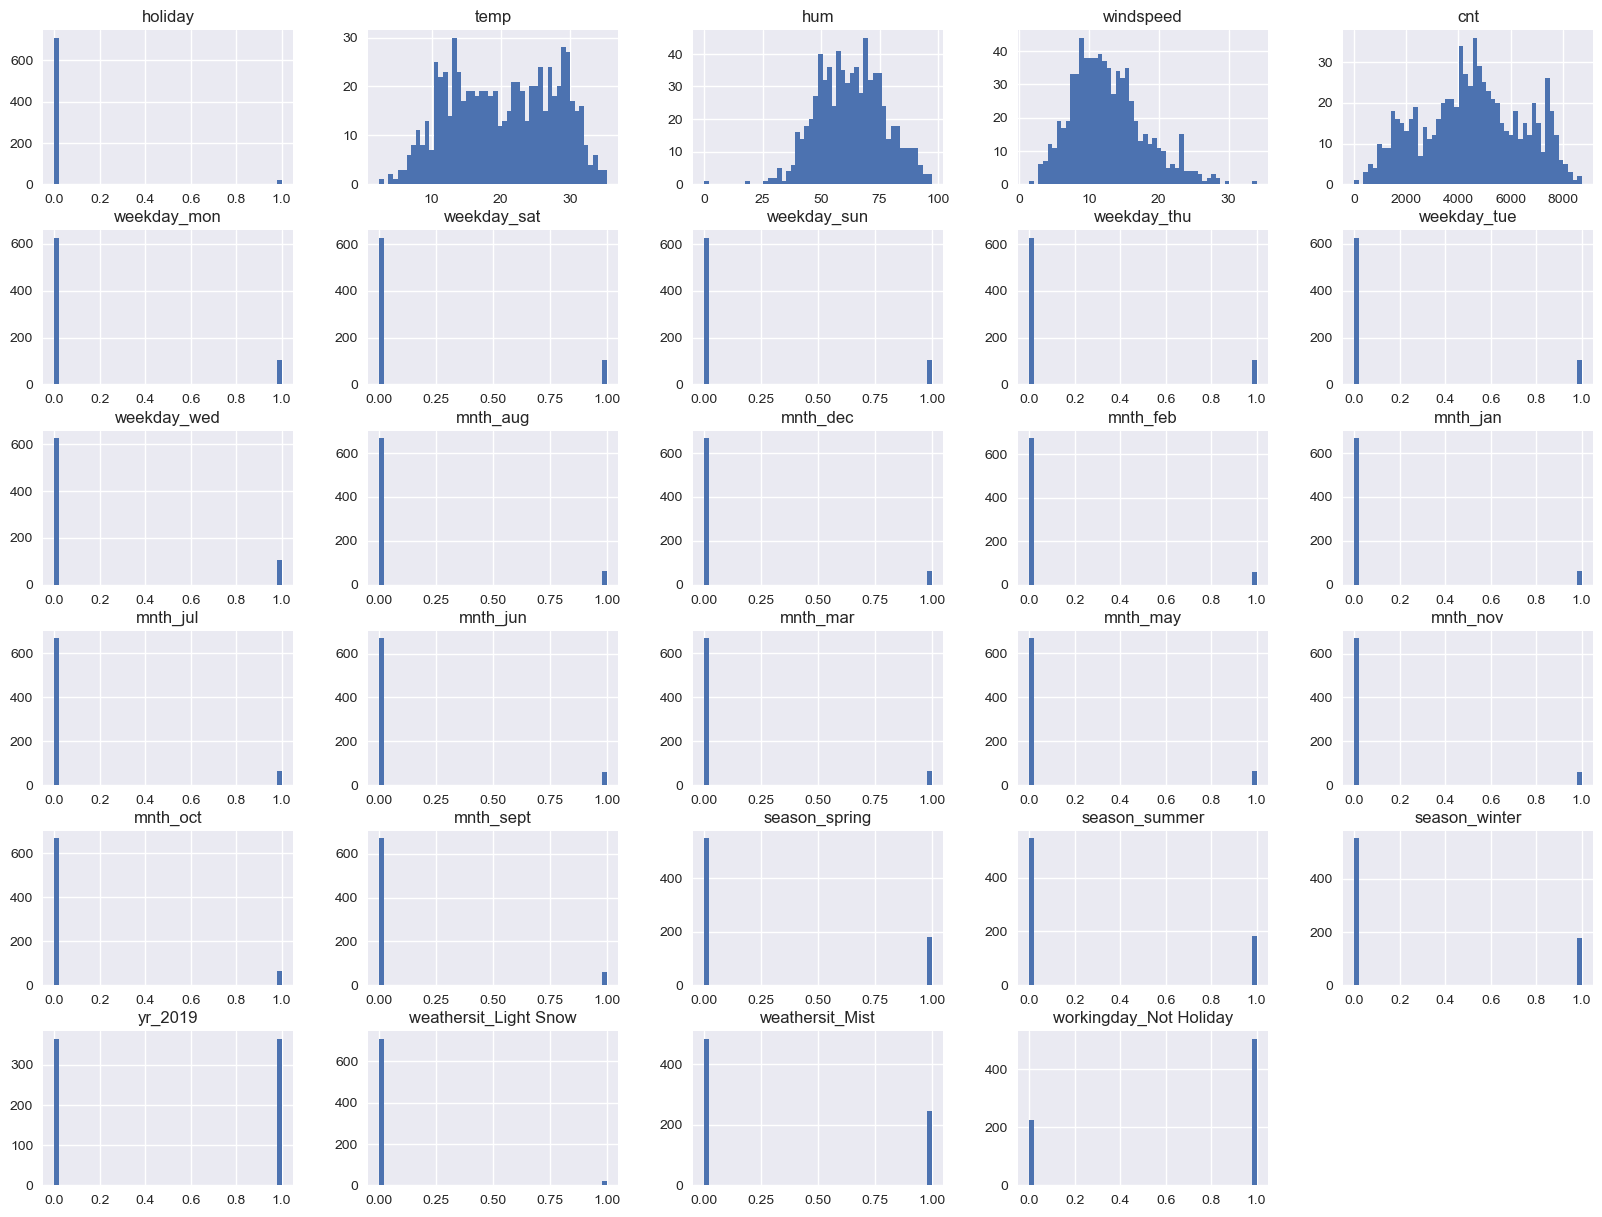

In [40]:
plt.style.use("seaborn")
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [41]:
df.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'cnt', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weathersit_Light Snow', 'weathersit_Mist',
       'workingday_Not Holiday'],
      dtype='object')

In [42]:
df.shape

(730, 29)

# Diving the dataset into dependent and independent variables

In [43]:
# Dependent variable 
y = df['cnt']

In [44]:
# Independent Variables
X = df.drop(["cnt"], axis =1)

In [45]:
# importing necessary liabraries

from sklearn.model_selection import train_test_split

# Divide the independent and dependent variables into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 28)
(219, 28)
(511,)
(219,)


# Standardizing all numerical column
- Standardizing all numerical column before model training is very important step, particularly when working on machine learning model
- Standardizing ensures that each feature contribute equally.
- Standardizing can make data less sensitive to outliers by centering data around zero, which can help in identifying and mitigating their impact.
- Standardizing improves the performence of the model and convergence speed.


### Min-Max Scaling Formula

To scale a feature using the Min-Max scaler, apply the following formula:

$$
x' = \frac{x - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
$$

Where:
- \( x \) is the original feature value,
- \( x' \) is the scaled feature value,
- \(min(X)\) is the minimum value of the feature,
- \(max(X)\) is the maximum value of the feature.



In [47]:
# X_train before scaling
X_train_before_scaled = X_train.copy()
X_train_before_scaled.head()

,holiday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,...,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,yr_2019,weathersit_Light Snow,weathersit_Mist,workingday_Not Holiday
235,0,27.606653,60.5000,16.958236,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
524,0,29.144153,43.7083,9.667229,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
12,0,6.765000,47.0417,20.167000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
161,0,29.725000,65.4583,10.374950,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
556,0,29.383347,63.3333,10.166111,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
# importing the liabrary for Standardizing, using min-max scaler.
from sklearn.preprocessing import MinMaxScaler


In [49]:
# This are the numerical column on which we neeed to perform Standardization
num_var = ["temp","hum","windspeed"]

In [50]:
scaler = MinMaxScaler()
X_train[["temp","hum","windspeed"]] = scaler.fit_transform(X_train[["temp","hum","windspeed"]])
X_train.head()

,holiday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,...,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,yr_2019,weathersit_Light Snow,weathersit_Mist,workingday_Not Holiday
235,0,0.753859,0.488399,0.527988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
524,0,0.802869,0.254640,0.255430,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
12,0,0.089497,0.301044,0.647940,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
161,0,0.821384,0.557424,0.281887,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
556,0,0.810494,0.527842,0.274080,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Comparison of all numerical column before and after scaling
- As we can see befor scaling features have vastly different range and units and after scaling features donot have vastly different range
- Features are rescaled to a specified range, typically [0, 1]


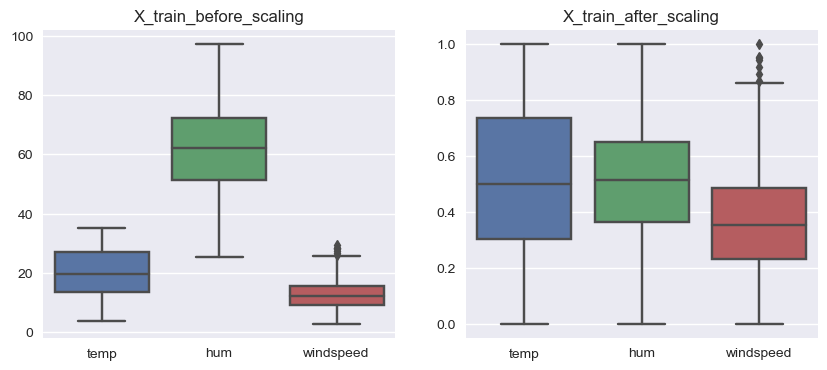

In [51]:
plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data =X_train_before_scaled[["temp","hum","windspeed"]])
plt.title("X_train_before_scaling")

plt.subplot(1,2,2)
sns.boxplot(data =X_train[["temp","hum","windspeed"]])
plt.title("X_train_after_scaling")
plt.show()

In [52]:
X_test[["temp","hum","windspeed"]] = scaler.transform(X_test[["temp","hum","windspeed"]])
X_test.head()

,holiday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,...,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,yr_2019,weathersit_Light Snow,weathersit_Mist,workingday_Not Holiday
196,0,0.771285,0.460557,0.415865,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
187,0,0.854058,0.552784,0.292782,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0.178804,0.340487,0.289684,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
31,0,0.125012,0.801018,0.027323,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
390,0,0.320391,0.717517,0.077873,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


## Using sklearn for model training

In [53]:
# importing Sklearn library for model training
from sklearn.linear_model import LinearRegression 
# importing all the matrics for checking accuracy of the model
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.metrics import r2_score
regression = LinearRegression()

In [54]:
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
regression.coef_

array([ -950.37855142,  3693.42775006, -1220.31121283, -1158.11354631,
        -210.29882417,  -426.86866093,  -366.17490156,    72.69563898,
        -120.99488241,  -106.06521604,  -238.34425478,  -428.89276821,
        -435.07383551,  -541.38983534,  -723.90899455,  -296.699586  ,
          13.64871021,   246.29461363,  -527.71781939,    87.35754197,
         396.36804715,  -824.30791434,   -34.11892382,   499.15997357,
        1921.24630875, -1721.10372847,  -395.56730252,  -559.69636691])

In [56]:
coeff_df = pd.DataFrame(regression.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
holiday,-950.378551
temp,3693.427750
hum,-1220.311213
windspeed,-1158.113546
weekday_mon,-210.298824
weekday_sat,-426.868661
weekday_sun,-366.174902
weekday_thu,72.695639
weekday_tue,-120.994882
weekday_wed,-106.065216


In [57]:
regression.intercept_

3729.3049627597265

In [58]:
y_pred = regression.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.8593975816329803

### Calculating Adjusted R-squared 

The formula for Adjusted R-squared is given by:

$$
\text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - k - 1} \right) \times (n - 1)
$$

where:

- \( R^2 \) is the R-squared value of the model.
- \( n \) is the number of observations (data points).
- \( k \) is the number of predictors (independent variables).


In [59]:
adjusted_r_squared = 1 - (1 - score) * (len(y_test)-1) / (len(y_test)- X_test.shape[1]-1)
adjusted_r_squared

0.8386772252420511

### Let look some other metrices

In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rsme = np.sqrt(mse)

print(f"Mean square error: {mse}")
print(f"Mean absolute error:{mae}")
print(f'Root Mean Squared Error:{rsme}')        


Mean square error: 589835.9949254497
Mean absolute error:581.4481521862168
Root Mean Squared Error:768.0078091565539


## Using stats for model training

In [61]:
import statsmodels.api as sm
X_train_stats = sm.add_constant(X_train)


In [62]:
model = sm.OLS(y_train,X_train_stats).fit()

In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.55e-169
Time:                        16:21:28   Log-Likelihood:                -4118.4
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     482   BIC:                             8418.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3729

### Using both sklearn and statsmodel we arealmost getting the same accuracy

- Using sklearn our rsqaured is 0.85 means we are achieving 85% accuarcy and adjusted r score is 83%
- Using statsmodel our rsqaured is 0.835 means we are achieving approximately 84% accuarcy and adjusted r squared is 84%
- Getting the same coefficent in both the model 


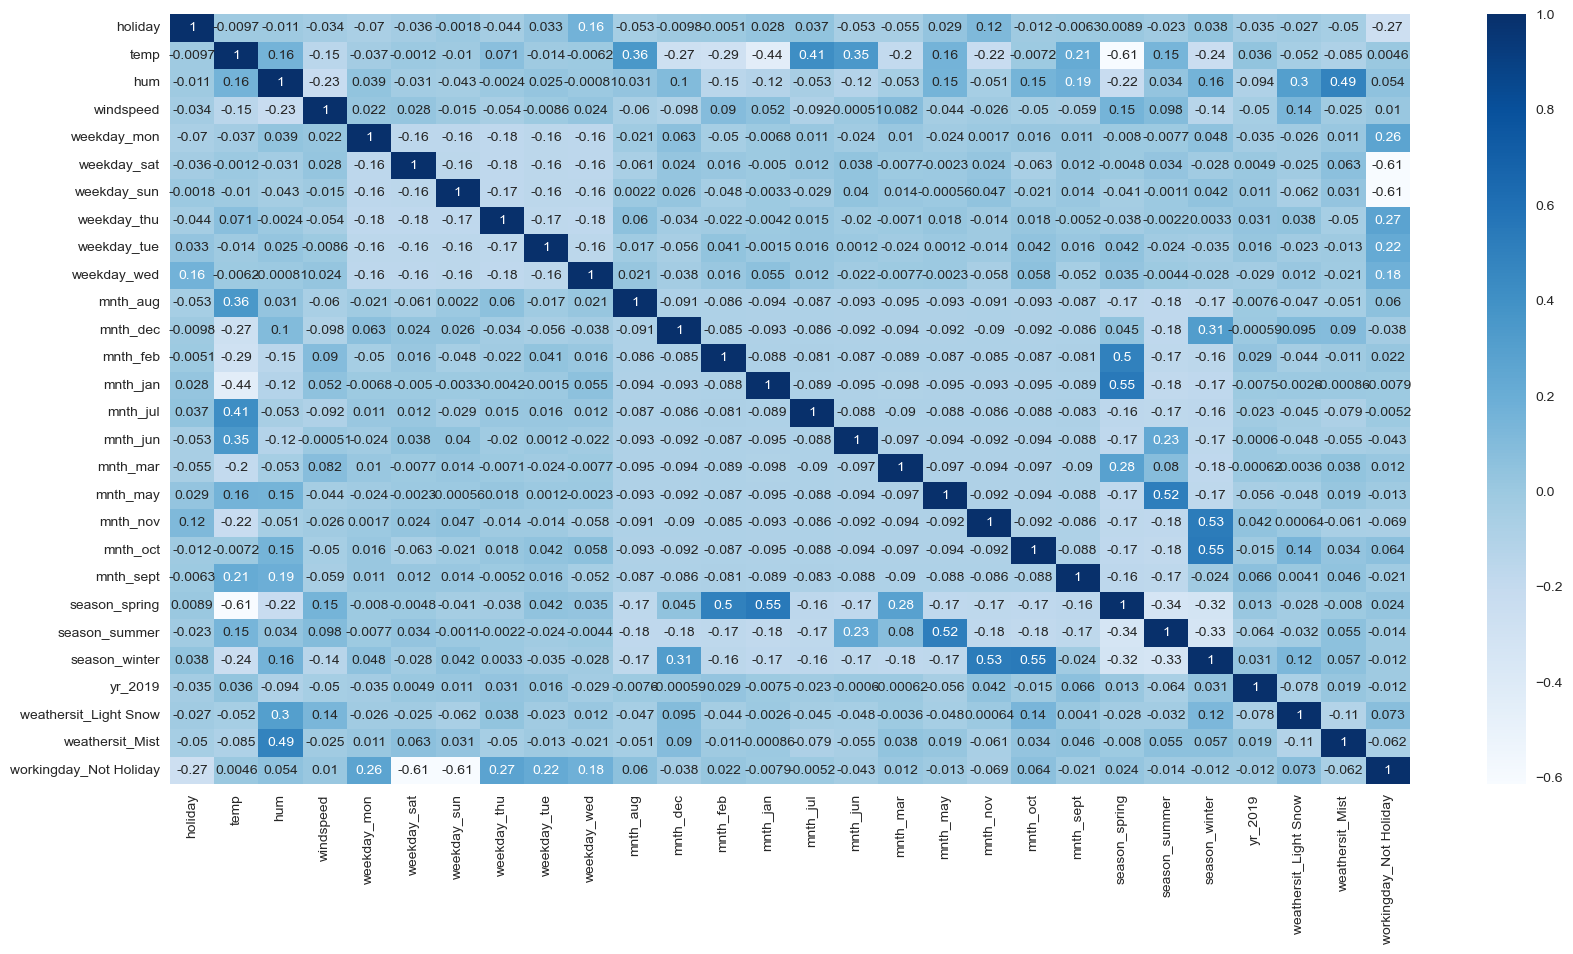

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(X_train.corr(), annot = True, cmap = "Blues")
plt.show()

In [65]:
# Making a list if allcolumns present in X_train
cols = X_train.columns 

### Feature Selection Using RFE

In [66]:
# importing neessary library
from sklearn.feature_selection import RFE

selector = RFE(regression, n_features_to_select=18,)
selector.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [67]:
selector.support_

array([ True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True])

In [68]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 7),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 8),
 ('mnth_sept', False, 3),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('workingday_Not Holiday', True, 1)]

In [69]:
col = X_train.columns[selector.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'weekday_sat', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov',
       'season_spring', 'season_winter', 'yr_2019', 'weathersit_Light Snow',
       'weathersit_Mist', 'workingday_Not Holiday'],
      dtype='object')

In [70]:
X_train.columns[~selector.support_]

Index(['weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_summer'],
      dtype='object')

## Calculating VIF for each feature

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calculate_vif(col): 
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [73]:
def calculate_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    models = sm.OLS(y_train,X_train_sm).fit()
    print(models.summary())
    return models


## Model1

In [74]:
# Building the model
calculate_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          9.40e-177
Time:                        16:21:32   Log-Likelihood:                -4124.2
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     492   BIC:                             8367.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3254

In [75]:
calculate_vif(col)

,Features,VIF
1,temp,19.45
2,hum,15.54
17,workingday_Not Holiday,5.66
3,windspeed,4.40
12,season_spring,4.37
13,season_winter,2.93
16,weathersit_Mist,2.49
8,mnth_jan,2.42
14,yr_2019,2.10
7,mnth_feb,2.08


## Model 2

In [76]:
# Let drop humidity as it showing very high vif 
col = [features for features in col if features != 'hum']
len(col)

17

In [77]:
# Building the model
calculate_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.43e-173
Time:                        16:21:32   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     493   BIC:                             8382.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2848

In [78]:
calculate_vif(col)

,Features,VIF
1,temp,10.00
16,workingday_Not Holiday,5.43
2,windspeed,4.31
11,season_spring,4.28
12,season_winter,2.87
7,mnth_jan,2.33
6,mnth_feb,2.08
13,yr_2019,2.06
3,weekday_sat,1.89
10,mnth_nov,1.87


## Model 3

- a common threshold for statistical significance is 0.05. This means that if a feature has a p-value less than or equal to 0.05, it is generally considered statistically significant and may be included in the model.

- so we can drop weekday_sat              


In [79]:
col = [features for features in col if features != 'weekday_sat']
len(col)

16

In [80]:
# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.31e-174
Time:                        16:21:32   Log-Likelihood:                -4135.2
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     494   BIC:                             8376.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2813

,Features,VIF
1,temp,8.38
10,season_spring,4.23
2,windspeed,4.20
15,workingday_Not Holiday,3.41
11,season_winter,2.86
6,mnth_jan,2.31
5,mnth_feb,2.06
12,yr_2019,2.06
9,mnth_nov,1.84
7,mnth_jul,1.69


## Model 4

In [81]:
# Now we can drop mnth_feb because of having high p value
col = [features for features in col if features != 'mnth_feb']
len(col)

15

In [82]:
# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.77e-174
Time:                        16:21:32   Log-Likelihood:                -4137.5
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     495   BIC:                             8375.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2728

,Features,VIF
1,temp,8.30
2,windspeed,4.19
14,workingday_Not Holiday,3.41
10,season_winter,2.81
9,season_spring,2.53
11,yr_2019,2.06
8,mnth_nov,1.82
6,mnth_jul,1.68
5,mnth_jan,1.64
3,mnth_aug,1.60


## Model 5

In [83]:
# Now we can drop mnth_jan because of having high p value
col = [features for features in col if features != 'mnth_jan']
len(col)

14

In [84]:
# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          7.80e-175
Time:                        16:21:32   Log-Likelihood:                -4139.3
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     496   BIC:                             8372.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2607

,Features,VIF
1,temp,8.11
2,windspeed,4.19
13,workingday_Not Holiday,3.40
9,season_winter,2.78
10,yr_2019,2.05
8,season_spring,1.93
7,mnth_nov,1.81
5,mnth_jul,1.67
3,mnth_aug,1.59
6,mnth_jun,1.58


## Model 6

In [85]:
# Now we can drop mnth_dec because of having high p value
col = [features for features in col if features != 'mnth_dec']
len(col)

13

In [86]:
# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          5.33e-175
Time:                        16:21:32   Log-Likelihood:                -4141.6
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     497   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2489

,Features,VIF
1,temp,8.00
2,windspeed,4.19
12,workingday_Not Holiday,3.40
8,season_winter,2.20
9,yr_2019,2.05
7,season_spring,1.89
4,mnth_jul,1.66
6,mnth_nov,1.62
3,mnth_aug,1.58
5,mnth_jun,1.58


## Model 7

In [87]:
# Now we can drop mnth_nov because of having high p value
col = [features for features in col if features != 'mnth_nov']

# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.23e-175
Time:                        16:21:33   Log-Likelihood:                -4143.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     498   BIC:                             8369.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2409

,Features,VIF
1,temp,7.83
2,windspeed,4.10
11,workingday_Not Holiday,3.40
8,yr_2019,2.04
6,season_spring,1.88
4,mnth_jul,1.65
7,season_winter,1.60
3,mnth_aug,1.57
5,mnth_jun,1.57
10,weathersit_Mist,1.50


## Model 8

In [88]:
# Now we can drop season_winter because of having high p value
col = [features for features in col if features != 'season_winter']

# Building the model
calculate_model(col)

# calculating the vif 
calculate_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.89e-175
Time:                        16:21:33   Log-Likelihood:                -4146.5
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2683

,Features,VIF
1,temp,7.80
2,windspeed,4.05
10,workingday_Not Holiday,3.25
7,yr_2019,1.98
6,season_spring,1.67
4,mnth_jul,1.57
3,mnth_aug,1.49
5,mnth_jun,1.49
9,weathersit_Mist,1.48
0,holiday,1.10


## Infrences

- As we can see dropping features not increasing the accuracy of the model, but decreasing the accuracy of the model.
  - intially we got the accuracy of 0.835 = 84% approx
  - in model 1 we got the accuracy of 0.83 = 83% No change
  - in model 2 we got the accuracy of 0.824 = 82.4% it decrease
  - in model 3 we got the accuracy of 0.824 = 82.4% No change
  - in model 4 we got the accuracy of 0.822 = 82.2% it decreases
  - in model 5 we got the accuracy of 0.821 = 82.1% it decreases
  - in model 6 we got the accuracy of 0.818 = 81.8% it decreases
  - in model 7 we got the accuracy of 0.818 = 81.8% No Change
  - in model 8 we got the accuracy of 0.816 = 81.6% it decreases

##### Let take model 8 as final model 
- because we remove all statistically insignificant feature  
- almost remove muti coliinear  variables  
- difference between r squared and adjusted r square is also less
  

In [89]:
regressor = LinearRegression()

In [90]:
regressor.fit(X_train[col], y_train)

LinearRegression()

In [91]:
regressor.coef_

array([ -803.86652483,  4086.75797048,  -969.52424191,  -554.22027456,
       -1017.81337152,  -540.22473235, -1185.67857765,  1967.47989632,
       -2193.99444102,  -640.63840263,  -240.54495204])

In [92]:
regressor.intercept_

2683.6520312517077

In [93]:
coeff_df = pd.DataFrame(regressor.coef_, X_train[col].columns, columns=['Coefficient'])
coeff_df

,Coefficient
holiday,-803.866525
temp,4086.757970
windspeed,-969.524242
mnth_aug,-554.220275
mnth_jul,-1017.813372
mnth_jun,-540.224732
season_spring,-1185.678578
yr_2019,1967.479896
weathersit_Light Snow,-2193.994441
weathersit_Mist,-640.638403


## Residual Analysis

In [94]:
y_train_pred = regressor.predict(X_train[col])

In [95]:
residual = y_train - y_train_pred

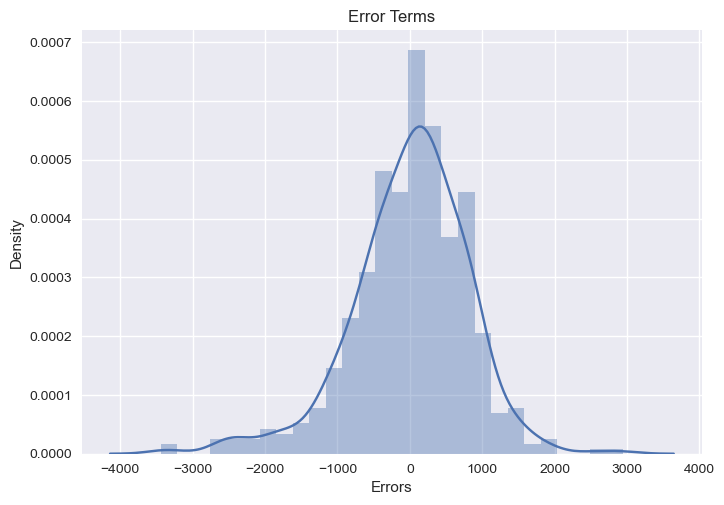

In [96]:
sns.distplot(residual)
plt.title("Error Terms")
plt.xlabel("Errors")
plt.show()

#### Errors are normally distribured here with mean 0


## Checking actual vs Predicted - Train Data

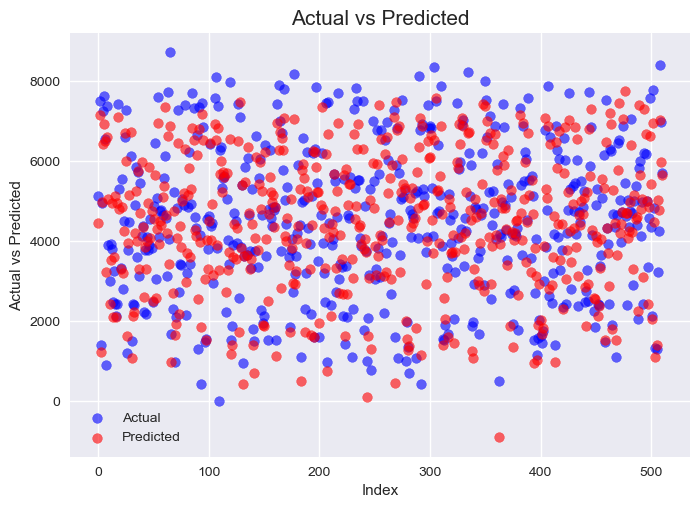

In [97]:
# Indices for each data point in the training set
indices = list(range(len(X_train)))

# Plotting the actual values as a scatter plot
plt.scatter(indices, y_train, label='Actual', color='blue', alpha=0.6)

# Plotting the predicted values as a scatter plot
plt.scatter(indices, y_train_pred, label='Predicted', color='red', alpha=0.6)

# Adding title and labels
plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Actual vs Predicted')

# Adding a legend to differentiate between actual and predicted
plt.legend()

# Displaying the plot
plt.show()


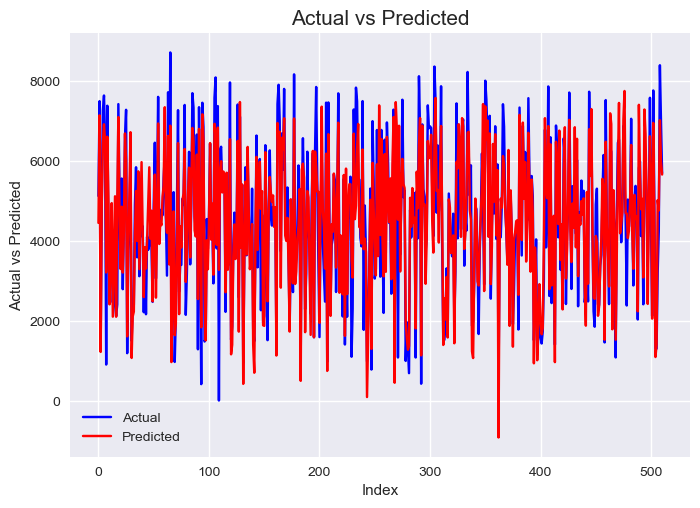

In [98]:

# Indices for each data point in the training set
indices = list(range(len(X_train)))

# Plotting the actual values
plt.plot(indices, y_train, label='Actual', color='blue')

# Plotting the predicted values
plt.plot(indices, y_train_pred, label='Predicted', color='red')

# Adding title and labels
plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Actual vs Predicted')

# Adding a legend to differentiate between actual and predicted
plt.legend()

# Displaying the plot
plt.show()


#### Based on the scatter and line plots above, the minimal difference between the actual and predicted values, indicates that the    model is performing well.



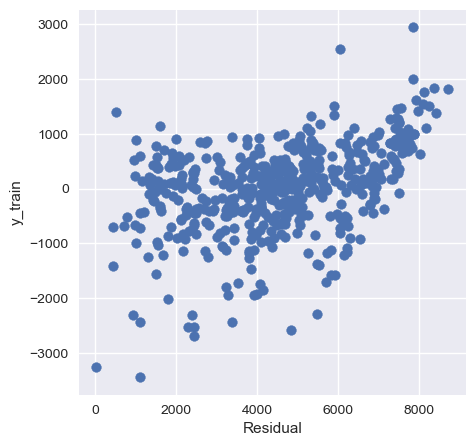

In [99]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


In [100]:
print(col)

['holiday', 'temp', 'windspeed', 'mnth_aug', 'mnth_jul', 'mnth_jun', 'season_spring', 'yr_2019', 'weathersit_Light Snow', 'weathersit_Mist', 'workingday_Not Holiday']


## Making Prediction and check the accuracy of both the train and test data

In [101]:
# Prediction for test data set
y_test_pred = regressor.predict(X_test[col])


In [102]:
# Checking the accuracy of the model for the test data

r2_score(y_test,y_test_pred)

0.8365417485058142

In [103]:
# clculating mean squared error,mean absolute error, Root Mean Squared Error for test data

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsme = np.sqrt(mse)

print(f"Mean square error: {mse}")
print(f"Mean absolute error:{mae}")
print(f'Root Mean Squared Error:{rsme}')        


Mean square error: 685717.6534985021
Mean absolute error:623.7489651969347
Root Mean Squared Error:828.0807047012399


In [104]:
# Calculating adjusted r squared for test data
adjusted_r_squared = 1 - (1 - r2_score(y_test,y_test_pred)) * (len(y_test)-1) / (len(y_test)- X_test[col].shape[1]-1)
adjusted_r_squared

0.8278555612283454

In [105]:
# Prediction for training data set

y_train_pred = regressor.predict(X_train[col])

In [106]:
# Checking the accuracy of the model

r2_score(y_train,y_train_pred)

0.8156671973732258

In [107]:
# clculating mean squared error,mean absolute error, Root Mean Squared Error for train data

mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsme = np.sqrt(mse)

print(f"Mean square error: {mse}")
print(f"Mean absolute error:{mae}")
print(f'Root Mean Squared Error:{rsme}')        


Mean square error: 654082.5593157233
Mean absolute error:604.703746367916
Root Mean Squared Error:808.7537074509911


In [108]:
# Calculating adjusted r squared for train data

adjusted_r_squared = 1 - (1 - r2_score(y_train,y_train_pred)) * (len(y_train)-1) / (len(y_train)- X_test[col].shape[1]-1)
adjusted_r_squared

0.811603748818327

- As we cans see above we agre getting good accuracy in test dataset in compare of training dataset 

## Homoscedacity

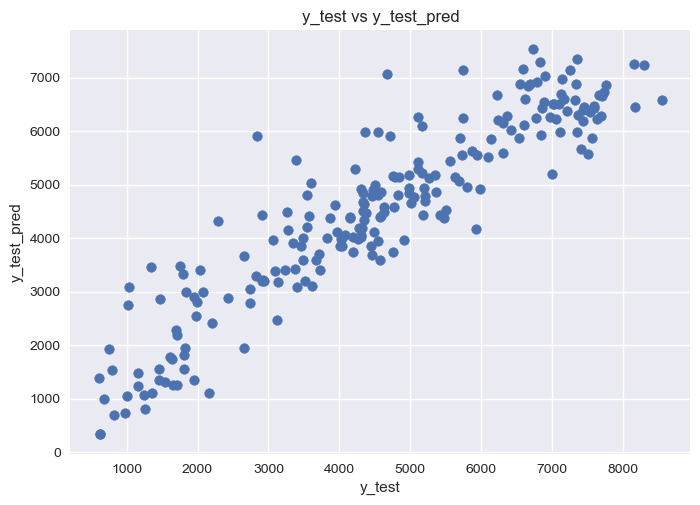

In [109]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')              
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred')
plt.show()


#### We can observe that the variance of the residuals (error terms) remains constant across the predicted values, indicating that the error term does not fluctuate significantly with changes in the predictor variable.



## Checking actual vs Predicted - Test Data

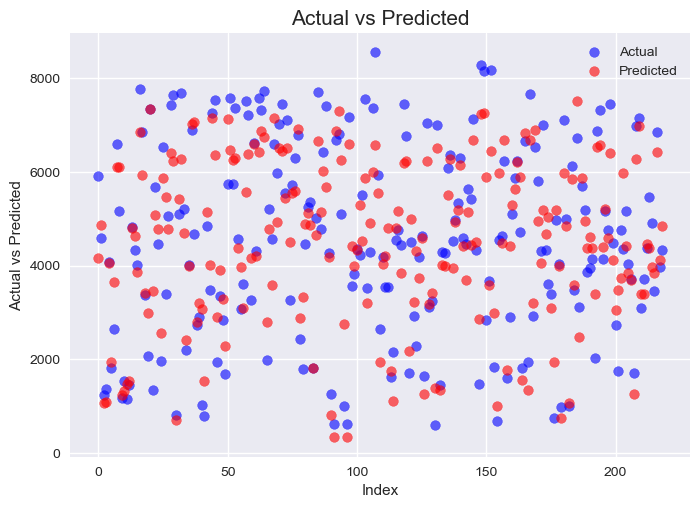

In [110]:
# Indices for each data point in the training set
indices = list(range(len(X_test)))

# Plotting the actual values as a scatter plot
plt.scatter(indices, y_test, label='Actual', color='blue', alpha=0.6)

# Plotting the predicted values as a scatter plot
plt.scatter(indices, y_test_pred, label='Predicted', color='red', alpha=0.6)

# Adding title and labels
plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Actual vs Predicted')

# Adding a legend to differentiate between actual and predicted
plt.legend()

# Displaying the plot
plt.show()


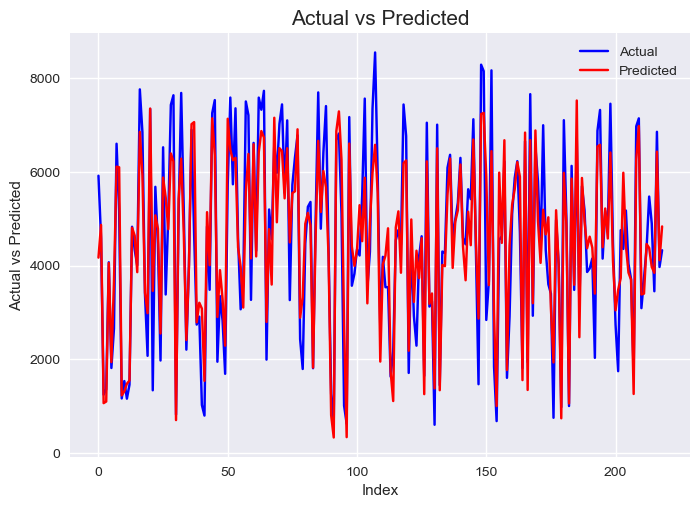

In [111]:

# Indices for each data point in the training set
indices = list(range(len(X_test)))

# Plotting the actual values
plt.plot(indices, y_test, label='Actual', color='blue')

# Plotting the predicted values
plt.plot(indices, y_test_pred, label='Predicted', color='red')

# Adding title and labels
plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Actual vs Predicted')

# Adding a legend to differentiate between actual and predicted
plt.legend()

# Displaying the plot
plt.show()


## Error term Test Data

In [112]:
resiual_test = y_test - y_test_pred

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


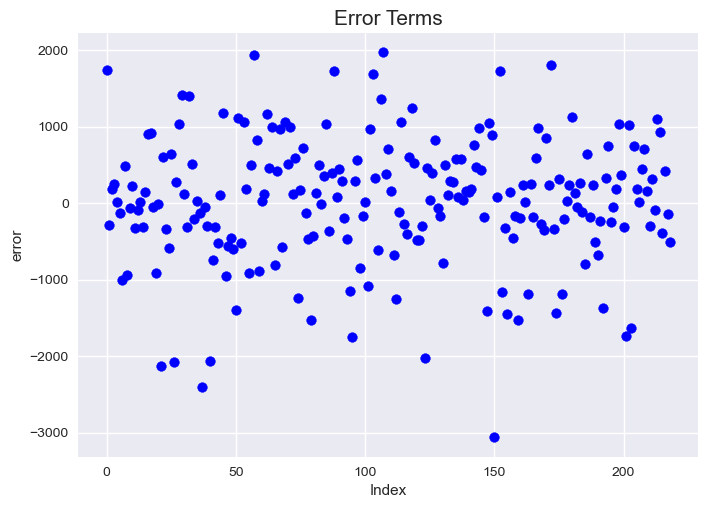

In [113]:

# Indices for each data point in the training set
indices = list(range(len(X_test)))
plt.scatter(indices, resiual_test, color='blue')

plt.title('Error Terms', fontsize=15)
plt.xlabel('Index')
plt.ylabel('error')


plt.legend()

# Displaying the plot
plt.show()


## Linearity Check

In [114]:
X_train_new =X_train[col]

In [115]:
X_train_new.columns

Index(['holiday', 'temp', 'windspeed', 'mnth_aug', 'mnth_jul', 'mnth_jun',
       'season_spring', 'yr_2019', 'weathersit_Light Snow', 'weathersit_Mist',
       'workingday_Not Holiday'],
      dtype='object')

In [116]:
X_train_new.head()

,holiday,temp,windspeed,mnth_aug,mnth_jul,mnth_jun,season_spring,yr_2019,weathersit_Light Snow,weathersit_Mist,workingday_Not Holiday
235,0,0.753859,0.527988,1,0,0,0,0,0,0,1
524,0,0.802869,0.255430,0,0,1,0,1,0,0,0
12,0,0.089497,0.647940,0,0,0,1,0,0,0,0
161,0,0.821384,0.281887,0,0,1,0,0,0,0,1
556,0,0.810494,0.274080,0,1,0,0,1,0,0,1


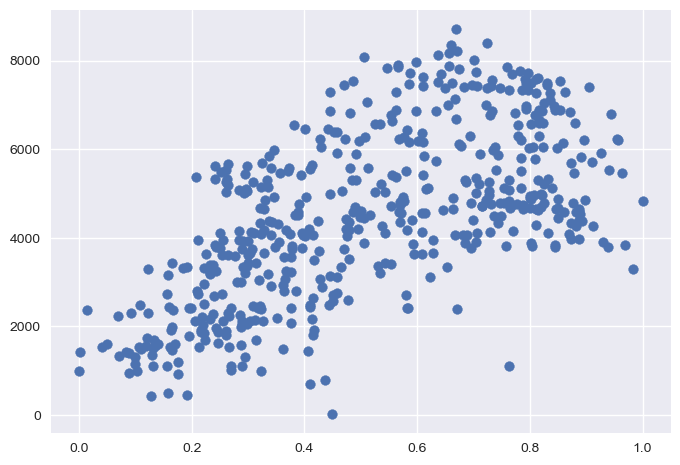

In [117]:
plt.scatter(x = X_train_new["temp"], y = y_train )
plt.show()

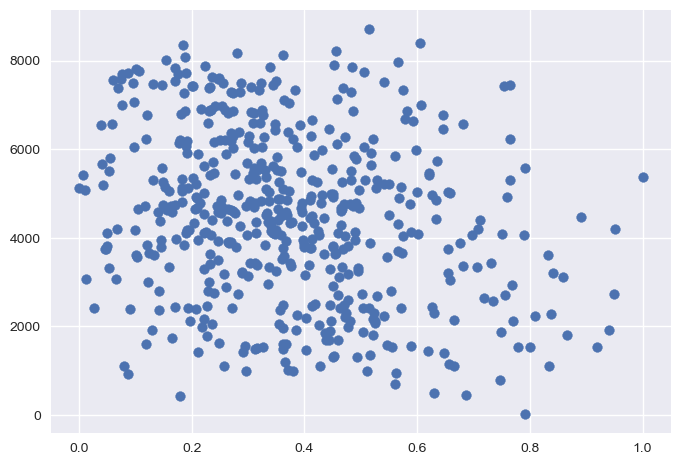

In [118]:
plt.scatter(x = X_train_new["windspeed"], y = y_train )
plt.show()

- We check the linear relationship between numerical independent variables and observe a positive correlation between temperature (dependent variable) and `y_train` (independent variable). Conversely, we find a negative correlation between wind speed and `y_train`.

### Cross Validation

In [119]:
# Use cross-validation to evaluate model performance on different subsets of datafrom sklearn.
from sklearn.model_selection import cross_val_score

# model_selection import cross_val_score
scores = cross_val_score(regression, X_train[col], y_train, cv=5)
print("Mean cross-validation score: ", scores.mean())


Mean cross-validation score:  0.8031754428668798


## For improving the accuracy we can use regularization techniques like ridge and lasso

## Lasso regression


Mean absolute error : 581.4481521862168
r2 score : 0.8089771326050668


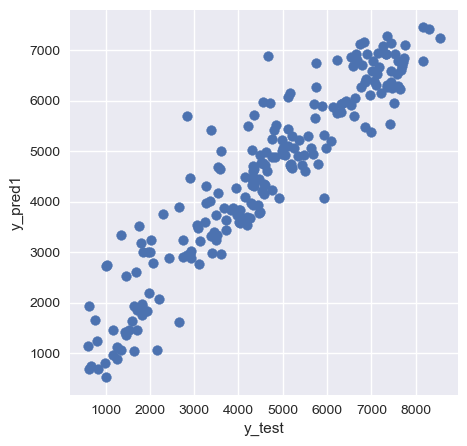

In [120]:
## Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred1 = lasso.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred1,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")

plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred1)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

## Ridge Regression

Mean absolute error : 581.4481521862168
r2 score : 0.805787890988849


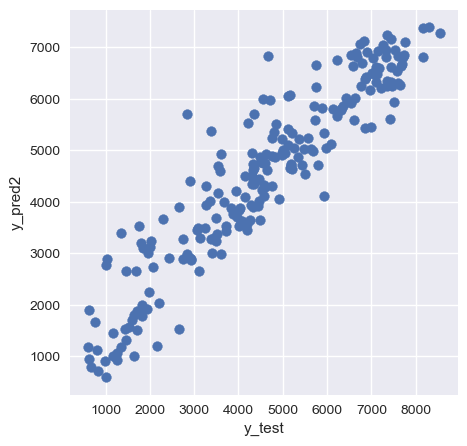

In [121]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred2 = ridge.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred2,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")

plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred2)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()



## Conclusion

## This are the important variables for prediction of demand of shared bikes
- holiday
- temp
- windspeed
- mnth_aug
- mnth_jul
- mnth_jun
- season_spring
- yr_2019
- weathersit_Light Snow
- weathersit_Mist
- workingday_Not Holiday